# Intro
This is a demo for progress made towards theorem proving in `Catlab.jl`

In [23]:
include("/Users/ksb/Catlab.jl/test/atp/ATP.jl"); # Where the wiring diagrams are defined
using Catlab.Graphics: to_graphviz, Graphviz, LeftToRight


show_diagram(d::WiringDiagram; 
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[]) = to_graphviz(
  label(d;w=w,i=i,o=o), orientation=LeftToRight, labels=true, label_attr=:xlabel,
  node_attrs=Graphviz.Attributes(:fontname => "Courier"), 
  edge_attrs=Graphviz.Attributes(:fontname => "Courier"))

function show_diagram(d::ACSet;
             w::Union{Vector{Pair{Int, String}}, Vector{String}}=String[],
             i::Union{Vector{Pair{Int, String}}, Vector{String}}=String[], 
             o::Union{Vector{Pair{Int, String}}, Vector{String}}=String[])
  show_diagram(cospan_to_wd(d); w=w,i=i,o=o)
end;


# Monoids
Generators for a theory are given by `Box` types. They have a symbol and a fixed number of inputs and outputs. We make terms with string diagrams, using generators and special commutative Frobenius algebra generators (ϵ, η, δ, μ - represented as boxes without a label). For example, `(e⋅x)⋅(x⋅e)`:

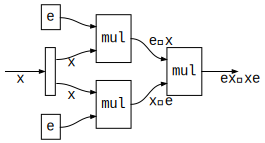

In [2]:
include("/Users/ksb/Catlab.jl/test/atp/ATP.jl"); # Where the wiring diagrams are defined
show_diagram(idxxid; w=[3=>"x",4=>"x",5=>"e⋅x", 6=>"x⋅e"], i=["x"],o=["ex⋅xe"])


We can represent rewrite rules as pairs of terms. E.g. the left identity rule.

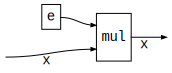

In [3]:
show_diagram(leftid.l, i=["x"], o=["x"])

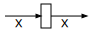

In [4]:
show_diagram(leftid.r,i=["x"], o=["x"])

The rule gets applied to a term by substituting the left or right pattern (via DPO rewriting) with a branching term that includes both sides of the equation.

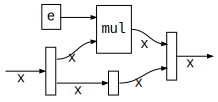

In [5]:
merge_leftid = branch(leftid.l, leftid.r)[1]
show_diagram(merge_leftid, w=["x","","x","x","x"];i=["x"], o=["x"])

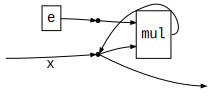

In [6]:
show_diagram(wd_to_cospan(merge_leftid, Σ_monoid)[2];i=["x"])

Let's prove a monoid theorem. We know the `(e*x)*(x*e)` term above is equivalent to `x*x`, shown below:

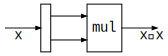

In [7]:
show_diagram(xx,i=["x"],o=["x⋅x"])

To prove these are equal, we apply the left and right identity rules to `(e*x)*(x*e)`:

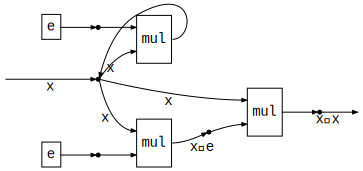

In [8]:
idxxid_sc       = wd_to_cospan(idxxid, Σ_monoid)[2]
applied_left_rw = apply_eq(idxxid_sc, T_monoid, :leftid);
show_diagram(applied_left_rw,w=[6=>"x",10=>"x⋅e"],i=["x"],o=["x⋅x"])

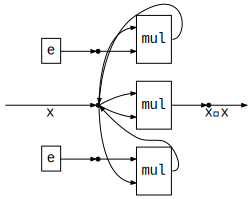

In [9]:
applied_both_rw = apply_eq(applied_left_rw, T_monoid, :rightid);
show_diagram(applied_both_rw, i=["x"], o=["x⋅x"])

There was no homomorphism until both rewrites.

In [10]:
xx_sc = wd_to_cospan(xx, Σ_monoid)[2] 
@assert !is_homomorphic(xx_sc, idxxid_sc)
@assert !is_homomorphic(xx_sc, applied_left_rw)
@assert  is_homomorphic(xx_sc, applied_both_rw)

We can also apply the rewrites in the reverse direction to prove the other way. Furthermore we can naively apply all rewrite rules `n` times and check for homomorphisms as a basic automated theorem proving tactic .

In [11]:
# Prove opposite direction
applied_left_rw = apply_eq(xx_sc,            T_monoid, :leftid;  forward=false)
applied_both_rw = apply_eq(applied_left_rw,  T_monoid, :rightid; forward=false)
@assert is_homomorphic(idxxid_sc, applied_both_rw)

# Prove automatically given set of rules
result = prove(T_monoid, idxxid, xx, n=1, oriented=true)
@assert !(result === nothing)  # success


We can also automatically prove that the identity element of a monoid is unique.

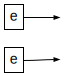

In [12]:
show_diagram(e_uniq.l)

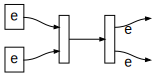

In [13]:
show_diagram(e_uniq.r,o=["e","e"])

In [14]:
result = prove(T_monoid, e_uniq.l, e_uniq.r, n=1, oriented=true)
@assert !(result === nothing)  # success

# Groups
To do interesting things with groups, we first need to prove that inverses are unique...

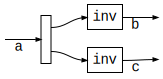

In [15]:
show_diagram(uniq_inv.l, i=["a"],o=["b","c"])

We will apply rewrites until this term has a homomorphism into the diagram (this proof is done step-by-step manually in a separate notebook).

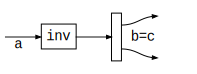

In [16]:
show_diagram(uniq_inv.r,i=["a"],w=["\t b=c"])

Likewise we also would want to show `a*x=b` has the unique solution `x=a⁻¹*b` ...

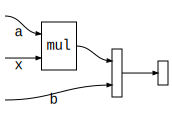

In [17]:
show_diagram(gdiv.l, i=["a","x","b"])

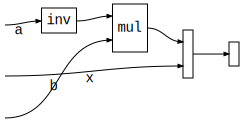

In [18]:
show_diagram(gdiv.r, i=["a","x","b"])

... and that we can left-cancel.

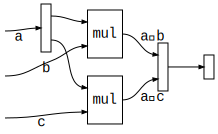

In [19]:
show_diagram(leftcancel.l, w=[3=>"a⋅b",4=>"a⋅c"],i=["a","b","c"])

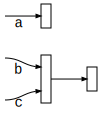

In [20]:
show_diagram(leftcancel.r,i=["a","b","c"])

# Dihedral groups
There are two typical ways to present dihedral groups, which are generated by elements `r` and `s` with order `n` and `2`, respectively. Let `n=3`.

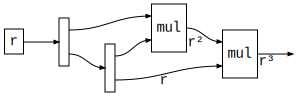

In [21]:
# r_order_3[2] asserts this is equal to the group unit element, e
show_diagram(r_order_3.l,w=[5=>"r", 6=>"r²"], o=["r³"]) 

There is one more axiom, typically stated as `srs⁻¹=r⁻¹` or `(sr)²=1`. If we can show these two imply each other, we'll have shown the corresponding presentations are equal. 

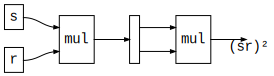

In [22]:
# an axiom declares this as equivalent to group unit element, e
show_diagram(sr2,o=["(sr)²"]) 

We can prove one direction by the following chain: `(sr)² = srsr = (srs⁻¹)r = (r⁻¹)r = 1`. We benefit from knowing `s=s⁻¹`, which can be proven by left cancellation applied to `s*s=s*s⁻¹` (this is relatively close to our axioms).

To do: prove the group axioms, then this dihedral group theorem.